### Sample for correlation using Alpha Vantage API
The closer the number is to +1, the stronger the relationship. If the figure is close to -1, it indicates that there is a strong inverse relationship.
The closer the correlation coefficient is to 0, the more likely it is that the two variables being compared don’t have any relationship to each other.

In [55]:
import os
from dotenv import load_dotenv

load_dotenv()

ALPHAVANTAGE_API_KEY = os.getenv('ALPHAVANTAGE_API_KEY')
ALPHAVANTAGE_API_KEY


'3AEV6D848GYHIB3F'

In [56]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

watchlist_df = pd.read_csv('watchlist.csv', header=None)
watchlist_df

,0,1,2,3,4
0,AAPL,MSFT,GOOGL,AMZN,SPY


In [57]:
watchlist = watchlist_df.iloc[0].tolist()
watchlist

['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'SPY']

In [58]:
app = TimeSeries(output_format='pandas')

In [59]:
stocks_df = pd.DataFrame()
for ticker in watchlist:
    alphav_df = app.get_daily_adjusted(ticker)
    alphav_df = alphav_df[0]
    alphav_df.columns = [i.split(' ')[1] for i in alphav_df.columns]
    stocks_df[ticker] = alphav_df['adjusted'].pct_change()

In [60]:
stocks_df

,AAPL,MSFT,GOOGL,AMZN,SPY
date,,,,,
2023-02-28,NaN,NaN,NaN,NaN,NaN
2023-02-27,0.003460,0.002967,-0.002110,-0.004988,0.003710
2023-02-24,-0.008180,-0.003758,-0.008234,-0.002773,-0.003394
2023-02-23,0.018335,0.022269,0.019746,0.024813,0.010798
2023-02-22,-0.003280,-0.012796,0.008362,-0.000313,-0.005291
...,...,...,...,...,...
2022-10-11,0.004626,-0.001506,-0.003895,-0.006112,0.003309
2022-10-10,0.010361,0.017036,0.006997,0.013011,0.006373
2022-10-07,-0.002350,0.021767,0.008379,0.007830,0.007694


In [61]:
stocks_df.AAPL.corr(stocks_df.MSFT)

0.7593807589578225

In [62]:
stocks_df.corr(method='pearson')


,AAPL,MSFT,GOOGL,AMZN,SPY
AAPL,1.000000,0.759381,0.732467,0.574674,0.870764
MSFT,0.759381,1.000000,0.818772,0.708069,0.850076
GOOGL,0.732467,0.818772,1.000000,0.700026,0.738931
AMZN,0.574674,0.708069,0.700026,1.000000,0.727748
SPY,0.870764,0.850076,0.738931,0.727748,1.000000


In [63]:
stocks_df.corr(method='spearman')

,AAPL,MSFT,GOOGL,AMZN,SPY
AAPL,1.000000,0.768287,0.761806,0.666456,0.852344
MSFT,0.768287,1.000000,0.816858,0.747446,0.894397
GOOGL,0.761806,0.816858,1.000000,0.765751,0.788732
AMZN,0.666456,0.747446,0.765751,1.000000,0.763043
SPY,0.852344,0.894397,0.788732,0.763043,1.000000


In [64]:
stocks_df.corr(method='kendall')

,AAPL,MSFT,GOOGL,AMZN,SPY
AAPL,1.000000,0.595960,0.584003,0.527932,0.685013
MSFT,0.595960,1.000000,0.636776,0.563389,0.730365
GOOGL,0.584003,0.636776,1.000000,0.607504,0.584828
AMZN,0.527932,0.563389,0.607504,1.000000,0.586477
SPY,0.685013,0.730365,0.584828,0.586477,1.000000


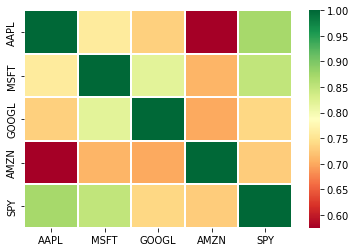

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(stocks_df.corr(), cmap='RdYlGn', linewidths=.1)
plt.show()


In [66]:
stocks_df.cov()

,AAPL,MSFT,GOOGL,AMZN,SPY
AAPL,0.000486,0.000395,0.000432,0.000375,0.000257
MSFT,0.000395,0.000558,0.000518,0.000495,0.000269
GOOGL,0.000432,0.000518,0.000717,0.000555,0.000265
AMZN,0.000375,0.000495,0.000555,0.000877,0.000288
SPY,0.000257,0.000269,0.000265,0.000288,0.000179
